First of all, a few notes:
* Check the first homework for a quick reminder on general rules.
* As before, no code hints. I trust your skills (if in doubt - check the seminar notebook).
* Arguably, this could be the most effortless homework so far. I will make it a little bit harder by requiring you to implement several algorithms by hand.

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

# Introduction [1.0]




## scRNA-seq

We **must** know our data before doing the analysis. To ease your life, here is an excellent state-of-the-art description of the scRNA-seq experiments. Read it and answer the following questions:

* [0.2] What is single-cell RNA-seq and how does it compare to bulk RNA-seq?

→ Single-cell sequencing examines the sequence information from individual cells with optimized next-generation sequencing technologies, providing a higher resolution of cellular differences and a better understanding of the function of an individual cell in the context of its microenvironment. RNA-seq allows profiling the transcripts in a sample in an efficient and cost-effective way. It was a major breakthrough in the late 00’s and has become ever more popular since, largely replacing other transcriptome-profiling technologies such as microarrays. Part of its success is due to the fact that RNA-seq allows for an unbiased sampling of all transcripts in a sample, rather than being limited to a pre-determined set of transcripts (as in microarrays or RT-qPCR).

Typically, RNA-seq has been used in samples composed of a mixture of cells, referred to as bulk RNA-seq.
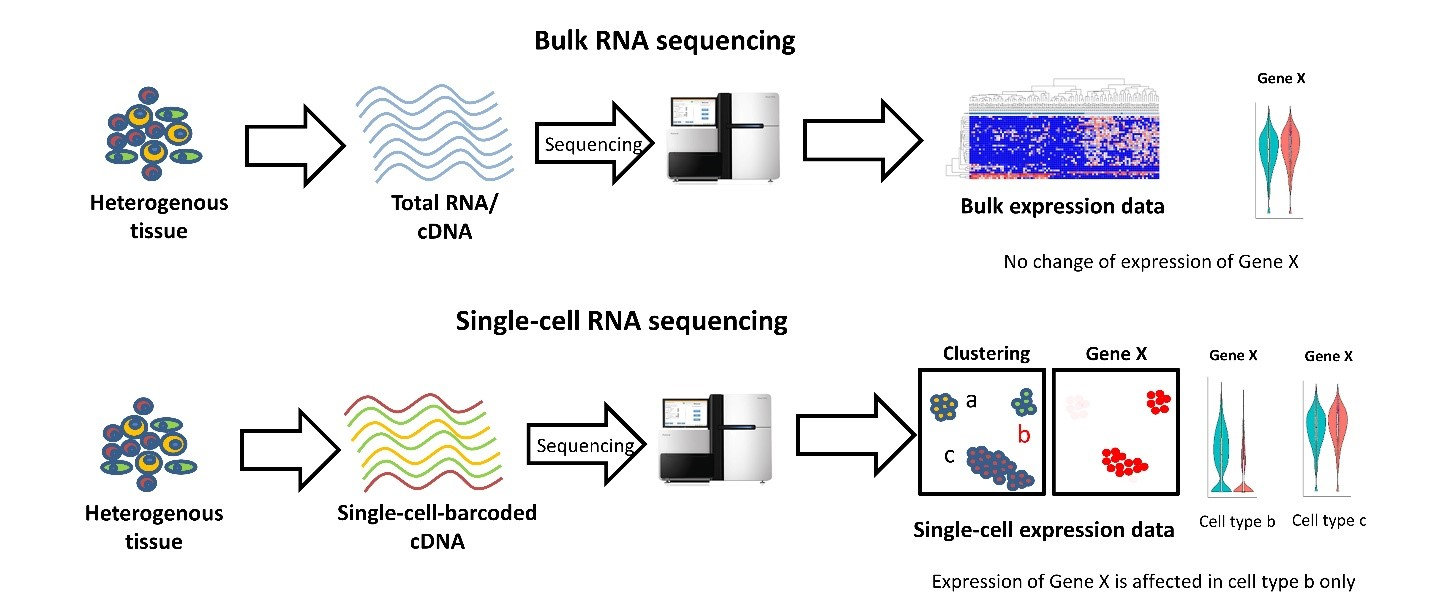

* [0.2] What are some of the typical applications of scRNA-seq?

→ For example, it can be used to characterise expression signatures between tissues in healthy/diseased, wild-type/mutant or control/treated samples. Or in evolutionary studies, using comparative transcriptomics of tissue samples across different species. Besides its use in transcript quantification, it can also be used to find and annotate new genes, gene isoforms, and other transcripts, both in model and non-model organisms.

* [0.2] What experimental design choices should be considered in scRNA-seq?

→ Several considerations need to be taken into account when performing scRNA-seq experiments. Factors such as the cost per cell, how many cells one needs, or how much to sequence each cell, may all influence our choice of protocol. On the other hand, care has to be taken to avoid biases due to batches being processed at different times and a lack of adequate replication may also constrain the types of analysis that can be done and therefore limit our ability to answer some questions of interest.

* [0.2] What are some of the challenges of scRNA-seq data compared to bulk data?

→ With bulk RNA-seq we can only estimate the average expression level for each gene across a population of cells, without regard for the heterogeneity in gene expression across individual cells of that sample. Therefore, it is insufficient for studying heterogeneous systems, e.g. early development studies or complex tissues such as the brain.

## Target experiment

To move on, you need to find/choose and download your favorite scRNA-seq dataset. Similar to what we did during the workshop, but everyone will have their own data to make it more fun.

See, for example, public [10x datasets](https://www.10xgenomics.com/resources/datasets?menu%5Bproducts.name%5D=Single%20Cell%20Gene%20Expression&query=&page=1&configure%5Bfacets%5D%5B0%5D=chemistryVersionAndThroughput&configure%5Bfacets%5D%5B1%5D=pipeline.version&configure%5BhitsPerPage%5D=500&configure%5BmaxValuesPerFacet%5D=1000) or [GEO](https://www.ncbi.nlm.nih.gov/gds/?term=scRNA-seq). Subsample cells or use more strict thresholds if the computations are too long.


[0.2] Please provide a brief description of the chosen dataset. I.e., what was the purpose of the original study, what is the protocol, and so on.

→ Human peripheral blood mononuclear cells (PBMCs) of a healthy female donor aged 25-30 were obtained by 10x Genomics from AllCells.

Libraries were generated from ~16,000 cells (11,485 cells recovered) as described in the Chromium Single Cell 3' Reagent Kits User Guide (v3.1 Chemistry Dual Index) (CG000315 Rev C) using the Chromium Controller and sequenced on an Illumina NovaSeq 6000 to a read depth of approximately 30,000 mean reads per cell.

The 10x Genomics Chromium Controller is a single-cell profiling technology that enables the analysis of large cell numbers at a high capture efficiency (of up to 65%). The platform allows for high-throughput analysis in a variety of cell types as well as single-cell nuclei. The workflow encapsulates cells or nuclei together with gel beads into nanodroplets (single-Poisson distribution loading). Trained core staff will prepare the libraries from single-cell suspensions submitted by the research investigator.

In [ ]:
! wget https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_PBMC_3p_nextgem_Chromium_Controller/10k_PBMC_3p_nextgem_Chromium_Controller_filtered_feature_bc_matrix.tar.gz
!tar -xzf 10k_PBMC_3p_nextgem_Chromium_Controller_filtered_feature_bc_matrix.tar.gz

--2022-11-29 20:41:35--  https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_PBMC_3p_nextgem_Chromium_Controller/10k_PBMC_3p_nextgem_Chromium_Controller_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93346135 (89M) [application/x-tar]
Saving to: ‘10k_PBMC_3p_nextgem_Chromium_Controller_filtered_feature_bc_matrix.tar.gz’

10k_PBMC_3p_nextgem 100%[===================>]  89.02M  59.2MB/s    in 1.5s    

2022-11-29 20:41:37 (59.2 MB/s) - ‘10k_PBMC_3p_nextgem_Chromium_Controller_filtered_feature_bc_matrix.tar.gz’ saved [93346135/93346135]



In [ ]:
!ls filtered_feature_bc_matrix

barcodes.tsv.gz  features.tsv.gz  matrix.mtx.gz


In [ ]:
! python3 -m pip uninstall -y matplotlib 
! python3 -m pip install scanpy matplotlib==3.2.2

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.3 MB/s 
     |████████████████████████████████| 12.4 MB 77 kB/s 
     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 96 kB 1.4 MB/s 
     |████████████████████████████████| 2.0 MB 14.1 MB/s 
     |████████████████████████████████| 1.1 MB 8.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c97aada31dc8684a8fb8a7d8e6470ecd92bf2f130bdfaac013083658ea982ce0
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=7b86f3f3f8560c95e7a1561

# Main flow [7.5]

Simple and tedious, you need to repeat the seminar results with your data and describe some algorithms in more detail. You can earn a few extra points for implementing algorithms by hand.


* [3.0] Repeat the main workflow: load & preprocess the data -> calculate PCA & UMAP -> color cells using K-means / Agg. Clustering / Leiden algorithms. What was the optimal number of clusters in your dataset?

In [ ]:
import scanpy as sc

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3

adata = sc.read_10x_mtx(
    'filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',      # use gene symbols for the variable names (variables-axis index)
    cache=True                     # write a cache file for faster subsequent reading
)
# Make all gene names unique (symbols MUST be unique by but in reality...)
adata.var_names_make_unique()

adata

... writing an h5ad cache file to speedup reading next time


AnnData object with n_obs × n_vars = 11485 × 36601
    var: 'gene_ids', 'feature_types'

In [ ]:
mask = adata.var_names.str.startswith('MT-')
print(f"Mito genes: {adata.var_names[mask].tolist()}")

adata.var['mt'] = mask

Mito genes: ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


In [ ]:
# Calculate common QC metrics (see docs for details)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

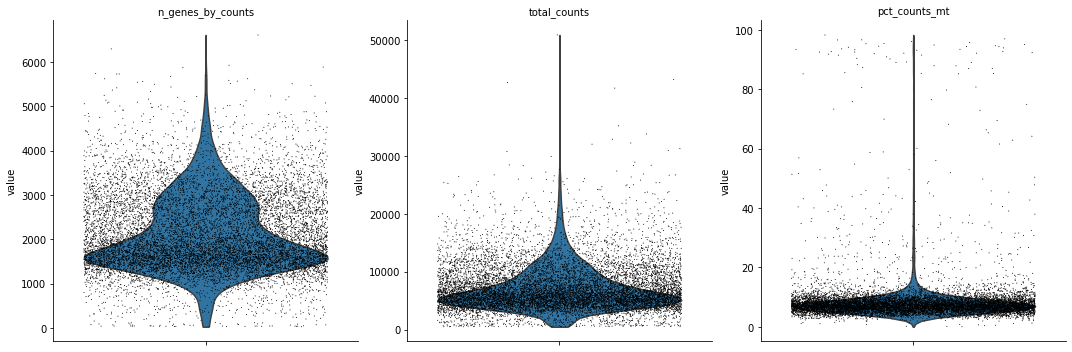

In [ ]:
# Plot the result
sc.pl.violin(
    adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
    jitter=0.4, multi_panel=True
)

In [ ]:
# Apply filters
adata = adata[adata.obs.n_genes_by_counts < 5_000, :]
adata = adata[adata.obs.total_counts < 25_000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]
adata

View of AnnData object with n_obs × n_vars = 11029 × 36601
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
# Normalize the data to CPM & take the log
sc.pp.normalize_total(adata, target_sum=1e6) # sum(cell counts) = 1e6
sc.pp.log1p(adata)

normalizing counts per cell


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:167: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=7, min_disp=0.5)

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


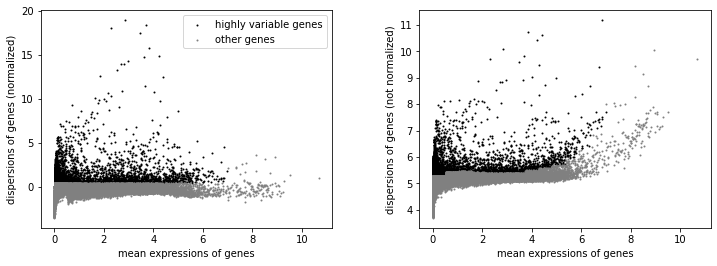

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 11029 × 4384
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:30)


In [ ]:
sc.pp.scale(adata, max_value=10) # clip values > 10

In [ ]:
import numpy as np
# Subsample to speed up the analysis
ind = np.random.choice(np.arange(len(adata.X)), 2_000, replace=False)

X = adata.X[ind].copy()
print(f"Cells vs Genes: {X.shape}")

Cells vs Genes: (2000, 4384)


In [ ]:
from sklearn.manifold import Isomap, MDS, TSNE, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Set of models to work with
embeddings = {
    "Isomap embedding": Isomap(n_components=2),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
    "t-SNE embedding": TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42),
    "Spectral embedding": SpectralEmbedding(n_components=2, random_state=32),
    "LLE embedding": LocallyLinearEmbedding(n_components=2, method="modified"),
    "PCA": PCA(n_components=2)
}

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


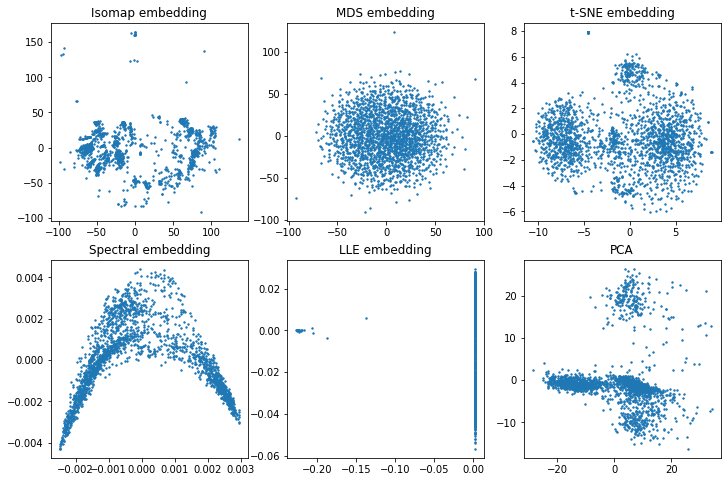

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

for ax, (name, model) in zip(axes, embeddings.items()):
  ax.set_title(name)
  transformed = model.fit_transform(X)
  ax.scatter(transformed[:, 0], transformed[:, 1], s=2)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:11)


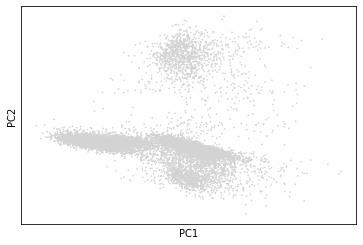

In [ ]:
sc.tl.pca(adata)
sc.pl.pca(adata)

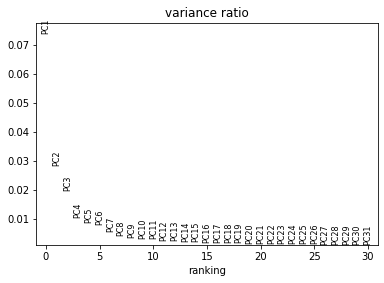

In [ ]:
sc.pl.pca_variance_ratio(adata)

In [ ]:
pca = PCA(n_components=40, random_state=123).fit(adata.X)

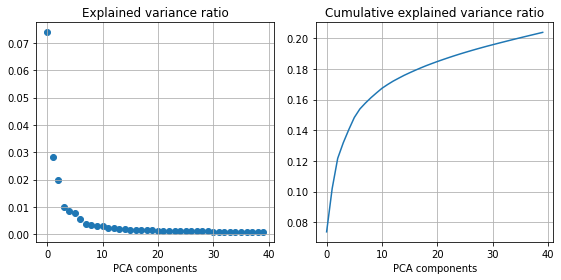

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize = (8, 4))

axes[0].scatter(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
axes[0].set_title("Explained variance ratio")

cumulative = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(cumulative)
axes[1].set_title("Cumulative explained variance ratio")

for ax in axes:
  ax.grid()
  ax.set_xlabel("PCA components")

fig.tight_layout()
fig.show()

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:44)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


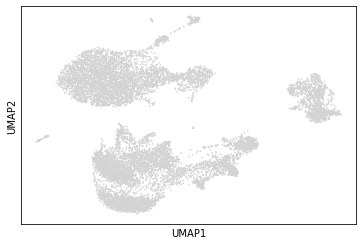

In [ ]:
sc.pl.umap(adata)

Clustering

In [ ]:
# Subsample to speed up the analysis
sample = sc.pp.subsample(adata, n_obs=1_500, copy=True)
sample

AnnData object with n_obs × n_vars = 1500 × 4384
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift

# Cluster elements
algorithms = [
    ("K-means", KMeans(n_clusters=10, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=10)),
    # ("Mean Shift", MeanShift()) # Too long
]

for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means
Agglomerative Clustering


In [ ]:
!python3 -m pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
     |████████████████████████████████| 3.2 MB 33.1 MB/s 


In [ ]:
# Recalculate neighbors & the UMAP
sc.pp.neighbors(sample)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


In [ ]:
# Run the Leiden clustering
sc.tl.leiden(sample, resolution=0.5)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


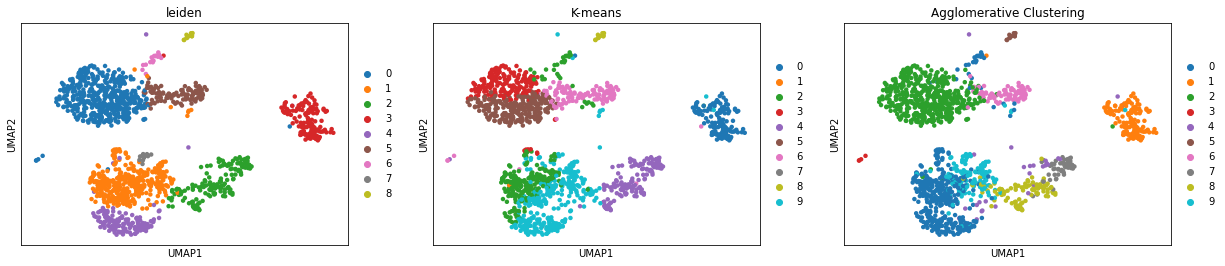

In [ ]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

* [1.5] Provide the formal algorithm and informal motivation for the PCA and K-means.

## PCA

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points. Principal component analysis has applications in many fields such as population genetics, microbiome studies, and atmospheric science. 


PCA of a multivariate Gaussian distribution centered at (1,3) with a standard deviation of 3 in roughly the (0.866, 0.5) direction and of 1 in the orthogonal direction. The vectors shown are the eigenvectors of the covariance matrix scaled by the square root of the corresponding eigenvalue, and shifted so their tails are at the mean.
The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared perpendicular distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

**Algorithm steps**

**Step 1: Get your data**

Separate your data set into Y and X. Y will be the validation set and X will be the training set. In simple terms, we will use X for our study and use Y to check whether our study is correct.

**Step 2: Give your data a structure**

Take the 2 dimensional matrix of independent variables X. Rows represent data items and columns represent features. The number of columns is the number of dimensions.


**Step 3: Standardize your data**

Given the columns of X, are features with higher variance more important than features with lower variance, or is the importance of features independent of the variance? (In this case, importance means how well that feature predicts Y.)


**Step 4: Get Covariance of Z**

Take the matrix Z, transpose it and multiply the transposed matrix by Z.


**Step 5: Calculate Eigen Vectors and Eigen Values**

Calculate the eigenvectors and their corresponding eigenvalues of ZᵀZ.


**Step 6: Sort the Eigen Vectors**

Take the eigenvalues λ₁, λ₂, …, λp and sort them from largest to smallest. In doing so, sort the eigenvectors in P accordingly. (For example, if λ3 is the largest eigenvalue, then take the third column of P and place it in the first column position.)

**Step 7: Calculate the new features**

Calculate Z* = ZP*.

This new matrix, Z*, is a centered/standardized version of X but now each observation is a combination of the original variables, where the weights are determined by the eigenvector. 

**Step 8: Drop unimportant features from the new set**

We need to determine which features from the new set we wish to keep for further study.


## K-Means

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

The unsupervised k-means algorithm has a loose relationship to the k-nearest neighbor classifier, a popular supervised machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

What are the basic steps of K-means clustering?

Let's suppose we have some data samples (X1, X2, …, Xn), and we want to divide these data samples into "K" different clusters. We can use the K-means algorithm to perform this work based on iterative logic. The complete implementation can be summarized in five steps.

**Step 1**

Accept inputs of data and the number of clusters to group that data. There are n data samples in our case, and we want to divide these samples into k different clusters.

**Step 2**

Initialize the first K clusters. There can be two ways to do that:
Pick first K samples, or take Random sampling of K elements from the available dataset. These K samples will be treated as temporary centroids (also called mean).

**Step 3**

Now we have (n-k) data samples left. Based on the proximity/distance to the K centroid values, each data sample from (n-k) will be assigned to only one of the K clusters. At this stage, all the samples have been assigned to some cluster. Each record is assigned to the nearest cluster using a measure of distance (e.g., Euclidean distance)

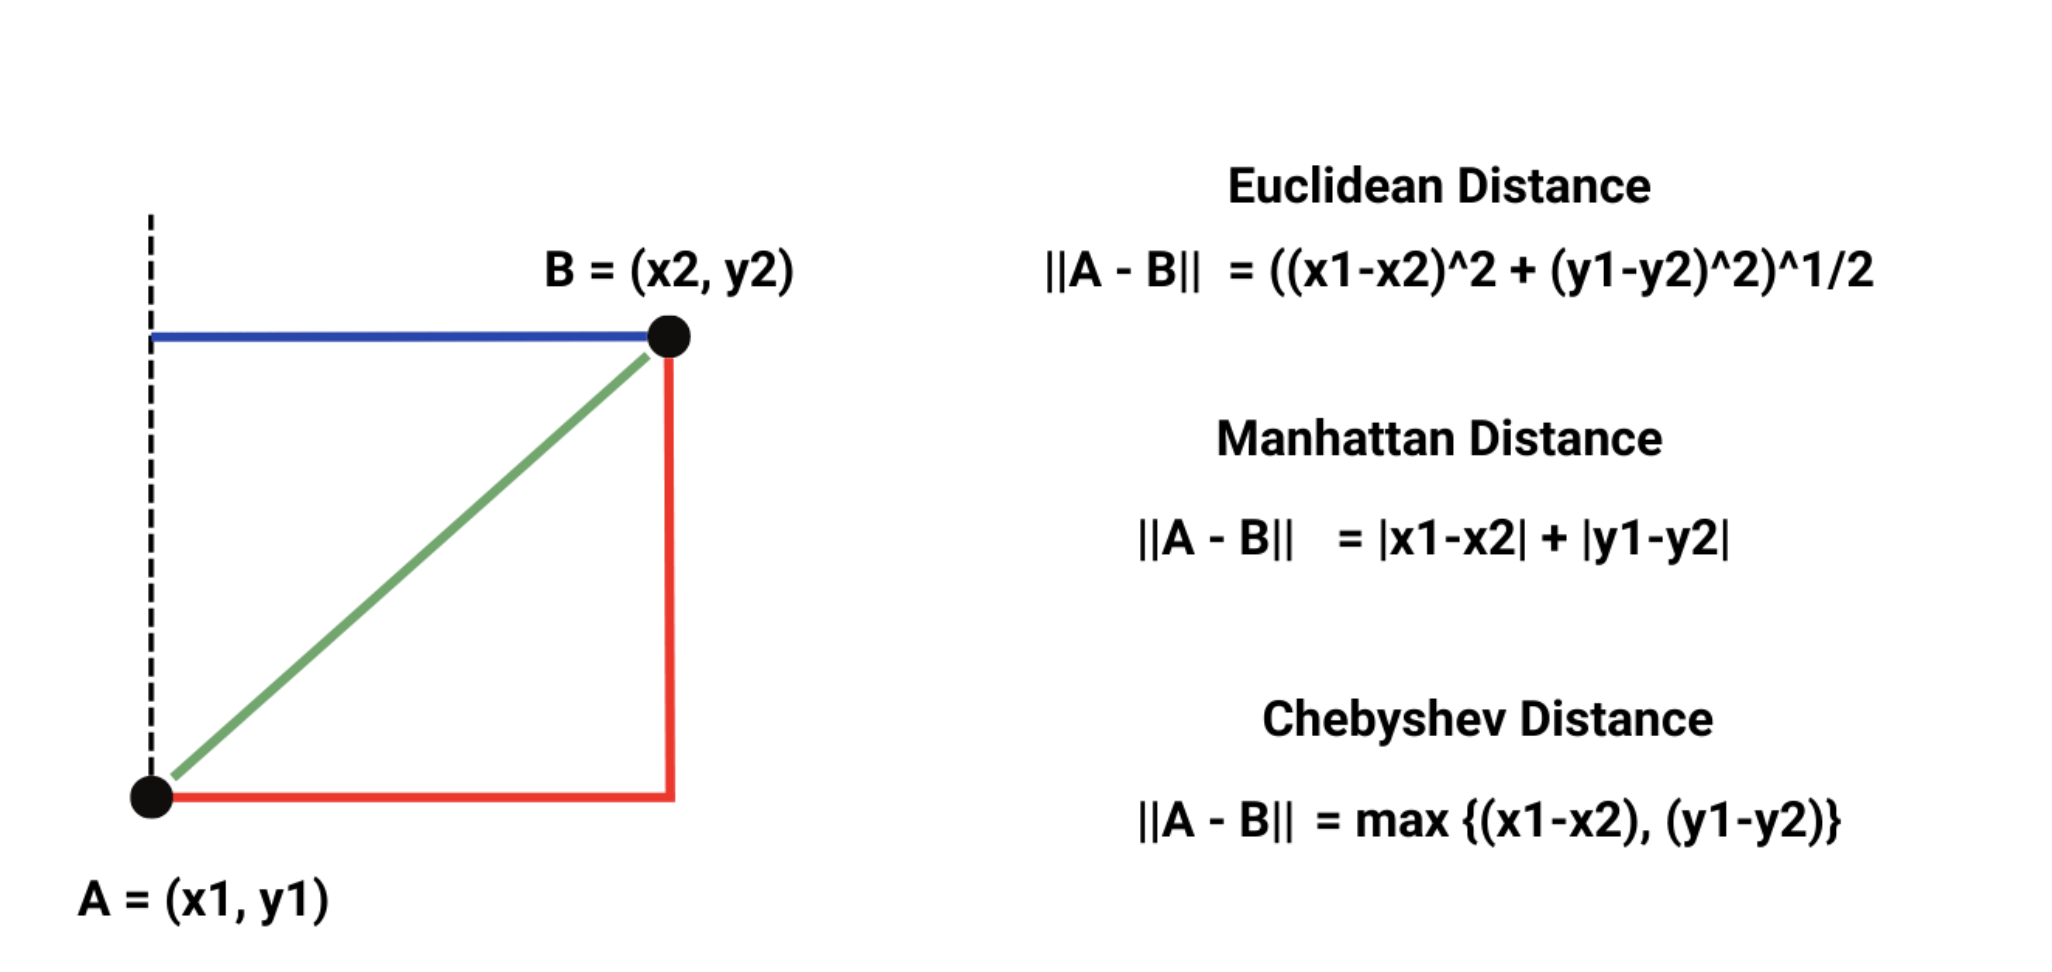

**Step 4**

We need to calculate the new centroids for every cluster. But this time, the centroid calculation will not be
random, but the samples present in the cluster will be averaged to calculate the mean. At this step, we will have
K centroids that can be different from the earlier chosen random K samples.

**Step 5**

We will iterate over this algorithm starting from Step 3 for the entire n samples. This will be repeated until we
see no/negligible movement of samples among clusters.
In this way, K-means groups the data samples into the desired number of clusters. The steps are very
straightforward and very intuitive. This can be considered one of the most important reasons for the popularity
of this algorithm.

* [1.5] Implement K-means with random initialization by hand, describe results, and compare them to the sklearn implementation.

In [ ]:
import pandas as pd
import random as rand

In [ ]:
from sklearn import preprocessing

In [ ]:
center_function = lambda x: x - x.mean()

#apply function to original NumPy array
data_centered = center_function(sample.X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
data_main = pca.fit_transform(data_centered)

In [ ]:
#Loading the required modules

import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
    
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
        
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        
    return points 



#Applying our function
label = kmeans(data_main,10,300)



In [ ]:
sample.obs['clust_k_means'] = label

In [ ]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

TypeError: ignored

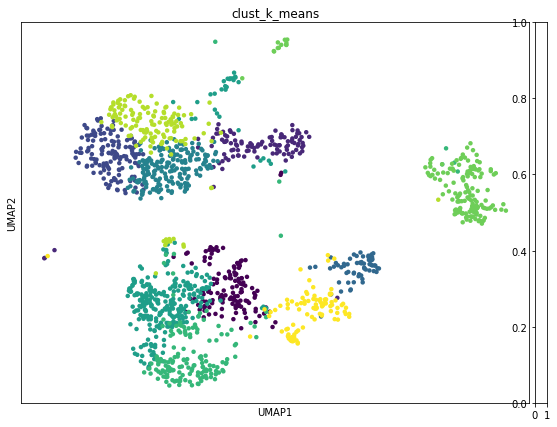

In [ ]:
with rc_context({'figure.figsize': (10, 7)}):
    sc.pl.umap(sample, color='clust_k_means')

Original K-means:

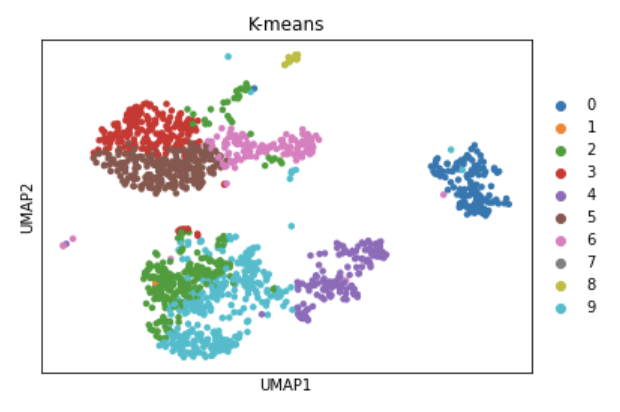

We can see no difference between custom K-means algorithm and original K-means algorithm -> everything is done well.

* [1.5] Do the same for PCA.

In [ ]:
import numpy as np
 
def PCA(X , num_components):
     
    X_meaned = X - np.mean(X , axis = 0)
     
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
columns = []

for i in range(40):
  columns.append('PC'+str(i+1))

In [ ]:
import pandas as pd

In [ ]:
#Applying it to PCA function
mat_reduced = PCA(sample.X , 40)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = columns)


In [ ]:
principal_df['PC2'] = principal_df['PC2'].apply(lambda x: -x)

In [ ]:
principal_df['PC1'] = principal_df['PC1'].apply(lambda x: -x)

Original PCA:

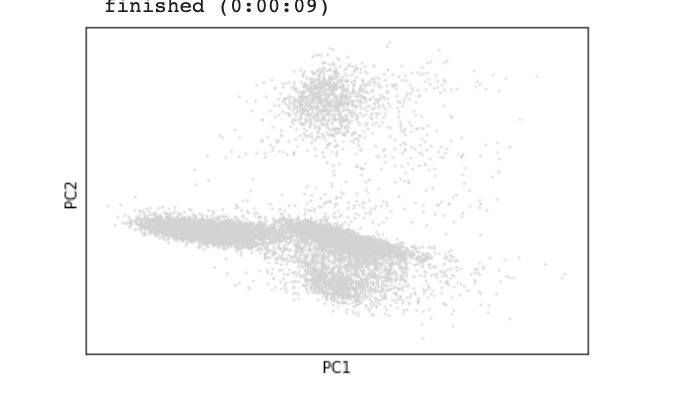

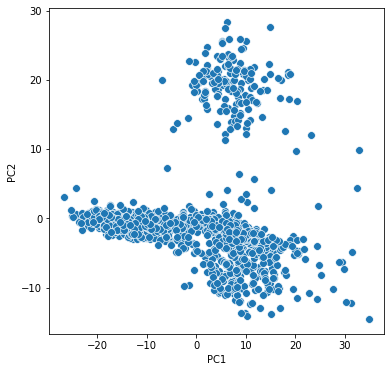

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire')


We can see no difference between custom PCA algorithm and original PCA algorithm -> everything is done well.

# Extra points [1.5]

This time the story will be simple - pick any ten plots from [this](https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html) tutorial and reproduce them with your dataset **and explain its content/purpose**. 

Plots are weighted uniformly, and each contributes 0.15 points. Don't classify cells' clusters; name them as 'Cluster N'.

In [ ]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

### Visualization of Leiden Algorithm

For the scatter plots, the value to plot is given as the color argument. It can also contain gene expression and other variables. As we have categorical variable with Leiden Algorithm, we can plot it.

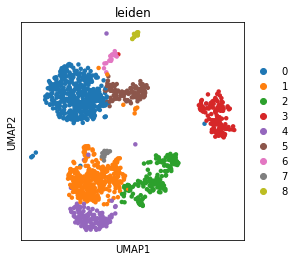

In [ ]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(sample, color='leiden')

### Dotplot for 5 genes expressions.


A quick way to check the expression of these genes per cluster is to using a dotplot. This type of plot summarizes two types of information: the color represents the mean expression within each of the categories (in this case in each cluster) and the dot size indicates the fraction of cells in the categories expressing a gene. Here we have gene expression of 5 genes: there names are located on axis X.

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


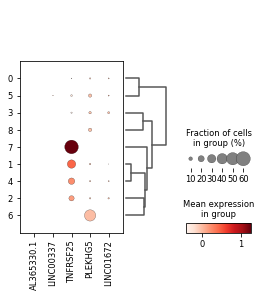

In [ ]:
sc.pl.dotplot(sample, sample.var.index[15:20], 'leiden', dendrogram=True)

### Violin plot

A different way to explore the markers is with violin plots. Here we can see K-means clusterization of UTS2 and AL034417.3.

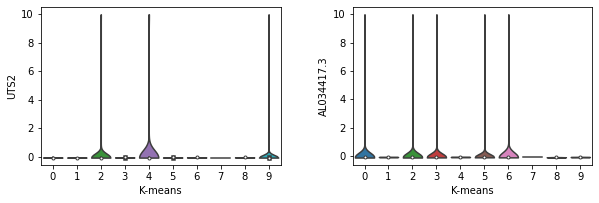

In [ ]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(sample, sample.var.index[20:22], groupby='K-means', stripplot=False, inner='box') 

### Visualization of K-means algorithm

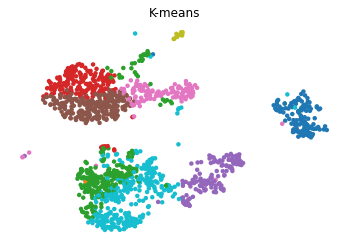

In [ ]:
sc.pl.umap(sample, color='K-means', legend_loc='total_counts_mt',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

### Violin plot

A different way to explore the markers is with violin plots. Here we can see Leiden clusterization of CD79A and MS4A1.

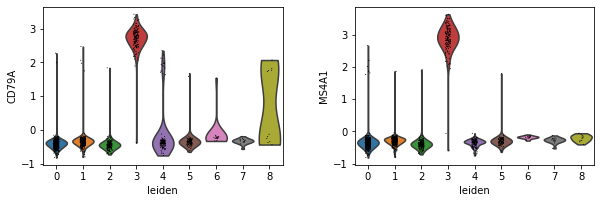

In [ ]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(sample, ['CD79A', 'MS4A1'], groupby='leiden' )

### Stacked-violin plot

To simultaneously look at the violin plots for all marker genes we use sc.pl.stacked_violin. As previously, a dendrogram was added to group similar clusters. Here we can see names of genes on axis X and clusterization of Leiden algorithm.

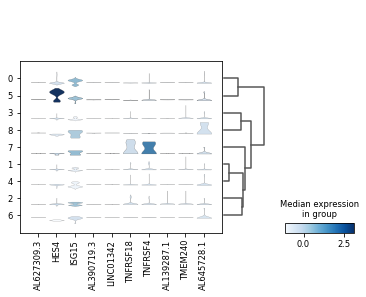

In [ ]:
ax = sc.pl.stacked_violin(sample, sample.var.index[0:10], groupby='leiden', swap_axes=False, dendrogram=True)

### Matrixplot

A simple way to visualize the distribution of genes is with a matrix plot. This type plot basically shows the same information as the color in the dotplots.

Here K-means algorithm is shown with names of genes on axis X.

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_K-means']`


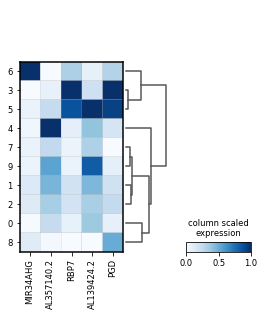

In [ ]:
sc.pl.matrixplot(sample, sample.var.index[25:30], 'K-means', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

### Matrixplot

Other useful option is to normalize the gene distribution using sc.pp.scale. Here we store this information under the scale layer. 

Here Agglomerative Clustering algorithm is shown with names of genes on axis X.

In [ ]:
sample.layers['scaled'] = sc.pp.scale(sample, copy=True).X

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Agglomerative Clustering']`


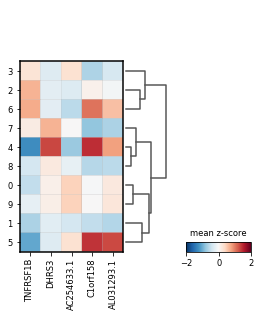

In [ ]:
sc.pl.matrixplot(sample, sample.var.index[35:40], 'Agglomerative Clustering', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

### Heatmap

Heatmaps do not collapse gene as in previous plots. Instead, each gene is shown in a row . The groupby information can be added and is shown using the same color code found for sc.pl.umap or any other embedding.

Here we can see genes distribution and its value of K-means algorithm.

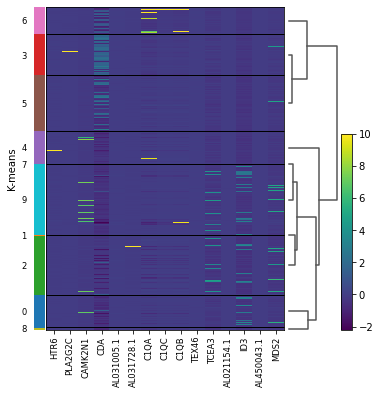

In [ ]:
ax = sc.pl.heatmap(sample, sample.var.index[45:60], groupby='K-means', cmap='viridis', dendrogram=True)

### Visualize algorithm distribution using dotplot

The dotplot visualization is useful to get an overview of the genes that show differential distibution. 

Here we can see genes distribution and its value of leiden algorithm.

In [ ]:
sc.tl.rank_genes_groups(sample, groupby='leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


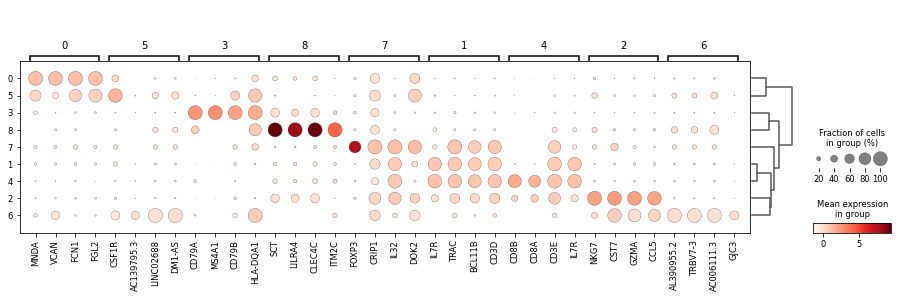

In [ ]:
sc.pl.rank_genes_groups_dotplot(sample, n_genes=4)